In [1]:
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 102s 1us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
import matplotlib.pyplot as plt

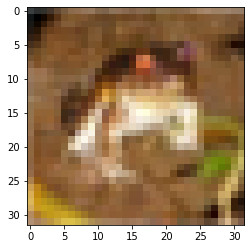

In [6]:
# FROG
plt.imshow(x_train[0])

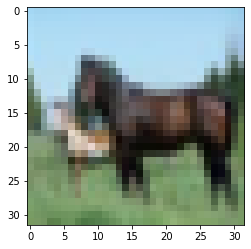

In [7]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
x_train[0].shape

(32, 32, 3)

In [10]:
x_train = x_train/225

In [11]:
x_test = x_test/255

In [12]:
x_train.shape

(50000, 32, 32, 3)

In [13]:
x_test.shape

(10000, 32, 32, 3)

# Labels

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train.shape

(50000, 1)

In [16]:
y_train.shape

(50000, 1)

In [17]:
y_cat_train = to_categorical(y_train,10)

In [18]:
y_cat_train.shape

(50000, 10)

In [19]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [20]:
y_cat_test = to_categorical(y_test,10)

# Building the Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [22]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [26]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 102s 2ms/sample - loss: 1.5352 - accuracy: 0.4508 - val_loss: 1.2924 - val_accuracy: 0.5320
Epoch 2/15
50000/50000 [==============================] - 74s 1ms/sample - loss: 1.1914 - accuracy: 0.5828 - val_loss: 1.1647 - val_accuracy: 0.5916
Epoch 3/15
50000/50000 [==============================] - 73s 1ms/sample - loss: 1.0448 - accuracy: 0.6366 - val_loss: 1.4596 - val_accuracy: 0.5171
Epoch 4/15
50000/50000 [==============================] - 72s 1ms/sample - loss: 0.9394 - accuracy: 0.6756 - val_loss: 1.1463 - val_accuracy: 0.6074
Epoch 5/15
50000/50000 [==============================] - 71s 1ms/sample - loss: 0.8666 - accuracy: 0.7030 - val_loss: 1.0565 - val_accuracy: 0.6371
Epoch 6/15
50000/50000 [==============================] - 72s 1ms/sample - loss: 0.8036 - accuracy: 0.7253 - val_loss: 1.0418 - val_accuracy: 0.6505
Epoch 7/15
50000/50000 [==============================]

In [27]:
losses = pd.DataFrame(model.history.history)

In [28]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.535178,0.45076,1.292351,0.5320
1,1.191401,0.58280,1.164678,0.5916
2,1.044802,0.63656,1.459560,0.5171
3,0.939375,0.67560,1.146260,0.6074
4,0.866642,0.70296,1.056492,0.6371


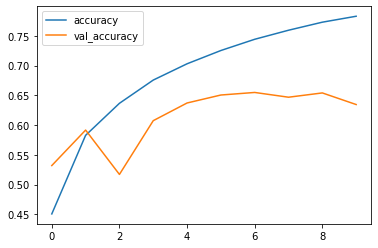

In [29]:
losses[['accuracy','val_accuracy']].plot()

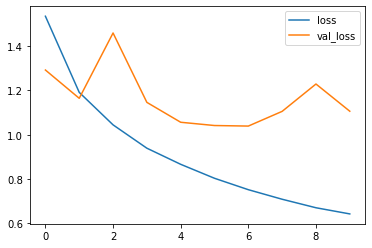

In [30]:
losses[['loss','val_loss']].plot()

In [31]:
model.metrics_names

['loss', 'accuracy']

In [32]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.1063329732894898, 0.6345]


In [33]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x_test)

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.61      0.67      1000
           1       0.89      0.68      0.77      1000
           2       0.63      0.42      0.50      1000
           3       0.52      0.41      0.46      1000
           4       0.41      0.80      0.54      1000
           5       0.67      0.39      0.49      1000
           6       0.66      0.81      0.73      1000
           7       0.78      0.60      0.68      1000
           8       0.68      0.81      0.74      1000
           9       0.67      0.80      0.73      1000

    accuracy                           0.63     10000
   macro avg       0.67      0.63      0.63     10000
weighted avg       0.67      0.63      0.63     10000



In [35]:
confusion_matrix(y_test,predictions)

array([[614,   9,  35,  21,  84,   5,  13,   8, 160,  51],
       [ 21, 680,   6,   8,  15,   1,  14,   4,  57, 194],
       [ 53,   3, 418,  50, 245,  53, 114,  21,  25,  18],
       [ 11,   2,  60, 411, 243,  81, 109,  21,  30,  32],
       [ 12,   0,  24,  26, 803,  11,  57,  40,  14,  13],
       [ 12,   1,  60, 164, 229, 390,  62,  51,  15,  16],
       [  6,   3,  20,  51,  83,   3, 813,   3,   6,  12],
       [  9,   2,  18,  27, 234,  33,  28, 600,  16,  33],
       [ 61,  18,  12,  13,  25,   6,  18,   4, 812,  31],
       [ 29,  44,  11,  16,  19,   3,   7,  13,  54, 804]], dtype=int64)

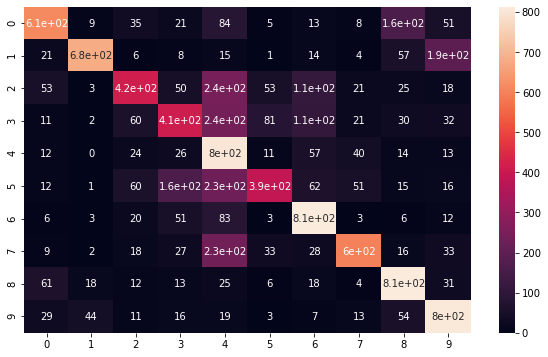

In [36]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

# Predicting a given image

In [37]:
my_image = x_test[16]

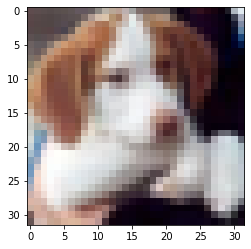

In [38]:
plt.imshow(my_image)

In [39]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_image.reshape(1,32,32,3))

array([5], dtype=int64)

In [40]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html